# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import copy
import pytz
import datetime 
import astral
import astropy.time as aptime
import os
import glob
from scipy import stats

# file paths & save paths

In [2]:
data_path = '/Users/MelisaT/Documents/Research/GPIDomeSeeing/data/datatables/'

In [3]:
save_path = '/Users/MelisaT/Documents/Research/GPIDomeSeeing/data/Results/sp_psd_slope_correlations'

In [4]:
txt_file1 = pd.read_csv(data_path + 'IFS_RawContrast_Gemini_env_20180530_all_seeing.csv')
txt_file1_copy = copy.copy(txt_file1)
raw_contrast_data= pd.DataFrame(txt_file1_copy)
print len(raw_contrast_data)

raw_contrast_data['dts'] = aptime.Time(raw_contrast_data['MJDOBS'], format='mjd').datetime 
raw_contrast_data['dts'] = raw_contrast_data['dts'].dt.tz_localize(pytz.UTC)

24155


# Read all the CSV files and concatentae all of them

In [76]:
allFiles = glob.glob(data_path + "/sp_psd_summary*.csv")

list_ = []

for file_ in allFiles[0:3]:
    df = pd.read_csv(file_,index_col=0)
    list_.append(df)

frame = pd.concat(list_, axis = 0, ignore_index = True)

In [11]:
txt_file2 = pd.read_csv(data_path + 'sp_psd_summary20181204.csv',index_col=0) 
txt_file2_copy = copy.copy(txt_file2)

sp_psd_data = pd.DataFrame(txt_file2_copy)
sp_psd_data['dts'] = pd.to_datetime(sp_psd_data.loc[:,'filename'].str.split('_').str.get(2) + '_' + sp_psd_data.loc[:,'filename'].str.split('_').str.get(3),
              utc=True, format = '%Y.%m.%d_%H.%M.%S')

sp_psd_data['dts'] = sp_psd_data['dts'].dt.tz_localize(pytz.UTC)

In [12]:
sp_psd_data

,filename,path,slope,whenstr,dts
0,aored_When_2016.10.13_21.17.57_poldm_phase.fits,/home/sda/mtallis/PhaseScripts/aotelem/Reduced...,-3.120774,20161013211757,2016-10-13 21:17:57+00:00
1,aored_When_2016.10.13_21.52.12_poldm_phase.fits,/home/sda/mtallis/PhaseScripts/aotelem/Reduced...,-3.242655,20161013215212,2016-10-13 21:52:12+00:00
2,aored_When_2016.10.13_22.30.52_poldm_phase.fits,/home/sda/mtallis/PhaseScripts/aotelem/Reduced...,-3.137460,20161013223052,2016-10-13 22:30:52+00:00
3,aored_When_2016.10.13_21.53.13_poldm_phase.fits,/home/sda/mtallis/PhaseScripts/aotelem/Reduced...,-3.146524,20161013215313,2016-10-13 21:53:13+00:00
4,aored_When_2016.10.13_22.36.13_poldm_phase.fits,/home/sda/mtallis/PhaseScripts/aotelem/Reduced...,-3.052361,20161013223613,2016-10-13 22:36:13+00:00
5,aored_When_2016.10.13_21.56.13_poldm_phase.fits,/home/sda/mtallis/PhaseScripts/aotelem/Reduced...,-3.310145,20161013215613,2016-10-13 21:56:13+00:00
6,aored_When_2016.10.13_22.3.48_poldm_phase.fits,/home/sda/mtallis/PhaseScripts/aotelem/Reduced...,-3.252667,2016101322348,2016-10-13 22:03:48+00:00
7,aored_When_2016.10.13_21.45.3_poldm_phase.fits,/home/sda/mtallis/PhaseScripts/aotelem/Reduced...,-3.274301,2016101321453,2016-10-13 21:45:03+00:00
8,aored_When_2016.12.21_2.40.9_poldm_phase.fits,/home/sda/mtallis/PhaseScripts/aotelem/Reduced...,-3.531664,201612212409,2016-12-21 02:40:09+00:00
9,aored_When_2016.12.21_3.53.43_poldm_phase.fits,/home/sda/mtallis/PhaseScripts/aotelem/Reduced...,-3.345508,2016122135343,2016-12-21 03:53:43+00:00


# Filter data

In [21]:
def filter_data(data, imag = 10., tau = 1., see = 2., all_cond = True):
    "This selects all rows of input dataframe that satisfy conditions set by the user"
    
    date1 = datetime.date(year = 2014, month = 1, day =1)
    
    #  AO system requirements
    cond1 = data['dts'] > date1 
    cond2 = data['COADDS'] == 1
    cond3 = (data['OBSMODE'] == 'H_coron')|(data['OBSMODE'] == 'Spec')
    cond4 = data['AOFRAMES'] == 1000

    #  Good seeing conditions
    cond5 = data['IMAG'] < imag #Bright Stars
    cond6 = data['MASSTAU'] > tau  # slow moving turbulence [ms]
    cond7 = data['DIMMSEE'] < see  # smaller scale turbulence ["]
    
    if all_cond:
        ind = np.where(cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7)[0]  
        print len(ind)
    else:
        ind = np.where(cond1 & cond2 & cond3 & cond4 & cond5)[0]  
        print len(ind)

    filtered_data = data.iloc[ind]
    #filtered_data = filtered_data.dropna(subset = ['CONTR040','cal_wfe','M1_avg','TAMBIENT','Outside_OE_temperature'])
    
    new_ind = np.arange(len(filtered_data))
    filtered_data = filtered_data.set_index(new_ind)
        
    return filtered_data

In [75]:
r = filter_data(raw_contrast_data,all_cond=True)

2959


# Merge PSD data with IFS data

In [105]:
sp_psd_raw_IFS_data =  pd.merge_asof(sp_psd_data[['slope','dts','filename','path']].sort_values('dts'),raw_contrast_data, on='dts',tolerance=pd.Timedelta('1min'))

In [106]:
sp_psd_raw_IFS_data = sp_psd_raw_IFS_data.dropna(subset=['slope','M1_avg'])

In [107]:
print sum(np.isfinite(sp_psd_raw_IFS_data['TAMBIENT']))

562


# Plotting

No grouping

562


<IPython.core.display.Javascript object>


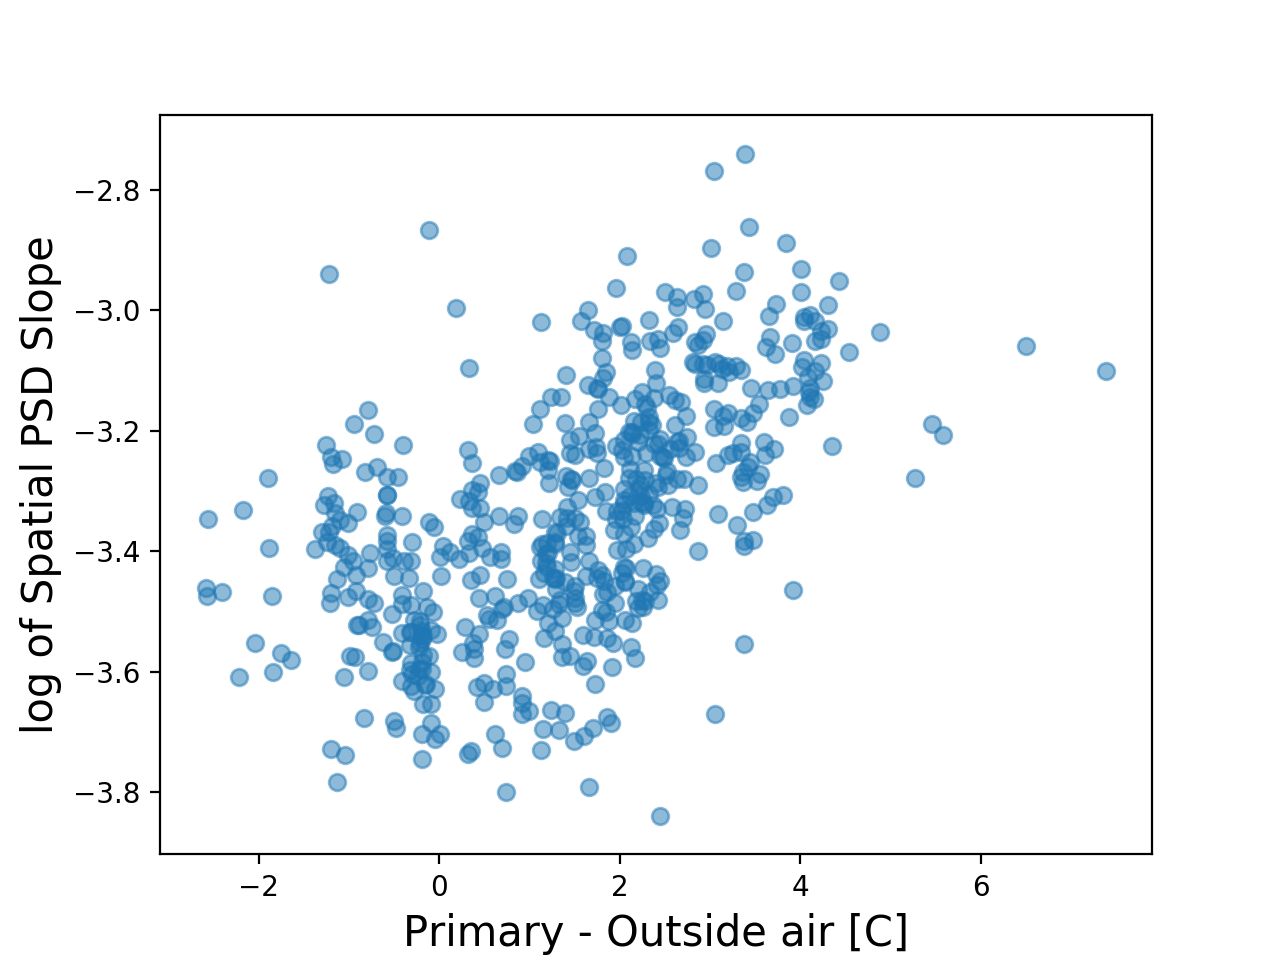

In [108]:
%matplotlib notebook

x = (sp_psd_raw_IFS_data['M1_avg']-sp_psd_raw_IFS_data['TAMBIENT'])
y = sp_psd_raw_IFS_data['slope']

print(sum(np.isfinite(y)))
plt.figure()
plt.scatter(x,y,alpha=.5)

plt.ylabel('log of Spatial PSD Slope',fontsize=15)
plt.xlabel('Primary - Outside air [C]',fontsize=15)

#plt.savefig(save_path+'sp_psd_slope_vs_delT_20181204.png')
#plt.plot(sp_psd_raw_IFS_data['slope'],'.',alpha=.5)

Number of unique objects and nights

In [89]:
print(len(pd.unique(sp_psd_raw_IFS_data['OBJNAME'])))
print(len(pd.unique(sp_psd_raw_IFS_data['night_number'])))

522
139


In [148]:
sp_psd_raw_IFS_data.keys()

Index([u'DATAFILE', u'DATALAB', u'OBJNAME', u'DATESTR', u'UTSTART', u'MJDOBS',
       u'ITIME', u'COADDS', u'OBSMODE', u'DISPERSR', u'IFSFILT', u'AOFRAMES',
       u'AOSPATIA', u'HMAG', u'IMAG', u'AOFLUX', u'RawDPwfe', u'PAR_ANG',
       u'PA', u'IAA', u'AZIMUTH', u'ELEVATIO', u'AIRMASS', u'AMSTART',
       u'AMEND', u'WINDM2', u'WINDM2DR', u'WINDDIRE', u'WINDSPEE', u'TAMBIENT',
       u'OMSATEMP', u'GLITEMP', u'GLOTEMP', u'MASSSEE', u'MASSTAU', u'DIMMSEE',
       u'MASS05CN', u'MASS1CN2', u'MASS2CN2', u'MASS4CN2', u'MASS8CN2',
       u'MASS16CN', u'MASSISOP', u'DRPDATE', u'CONTR025', u'CONTR040',
       u'CONTR080', u'dts', u'OE_Interior_Air_temperature',
       u'OMSS_AO_Bench_temperature', u'OMSS_Interface_Structure_temperature',
       u'OMSS_Mounting_Frame_temperature', u'Outside_OE_temperature',
       u'cal_wfe', u'T_M1+Y', u'T_M1-Y', u'T_TrussAirLow+X',
       u'T_TrussAirMid+X', u'T_TrussAirTop+X', u'T_TrussSurLow+X',
       u'T_TrussSurMid+X', u'T_TrussSurTop+X', u'T_twr', u'

With grouping

In [109]:
grouped = sp_psd_raw_IFS_data.groupby(['night_number', 'OBJNAME'], as_index= False).mean().dropna(subset = ['slope','M1_avg'])

In [110]:
grouped

,night_number,OBJNAME,slope,DATESTR,MJDOBS,ITIME,COADDS,AOFRAMES,AOSPATIA,HMAG,...,dome_mid,dome_top,hours_from_sunset,hours_from_sunrise,OE_Interior_Air_temperature_dT,OMSS_AO_Bench_temperature_dT,OMSS_Interface_Structure_temperature_dT,OMSS_Mounting_Frame_temperature_dT,Outside_OE_temperature_dT,OMSATEMP_dT
0,1.0,CC Eri,-3.320440,141109.0,56970.150926,59.64639,1.0,1000.0,4.000000,5.000,...,11.440000,10.120000,4.360000,18.005833,1.696383e-01,NaN,1.545737e-01,1.607497e-01,4.895752e-02,0.129796
1,1.0,DK Cet,-3.534539,141109.0,56970.096974,59.64639,1.0,1000.0,4.000000,6.555,...,11.880000,10.890000,3.066111,16.710556,6.057365e-02,NaN,1.417466e-01,2.559969e-01,-2.996924e-01,0.129114
2,2.0,AU Mic,-3.479527,141110.0,56971.027689,59.64639,1.0,1000.0,3.500000,4.831,...,12.990000,12.710000,1.388889,15.059653,-2.082394e-01,NaN,-1.724038e-01,-1.850233e-01,-4.919665e-01,-0.046761
3,2.0,HD 224228,-3.402030,141110.0,56971.057676,59.64639,1.0,1000.0,4.000000,6.007,...,12.410000,11.780000,2.108241,15.779907,-1.949076e-01,NaN,-1.645076e-01,-1.990814e-01,-5.992658e-01,-0.070214
4,2.0,HR 789,-3.295455,141110.0,56971.146183,59.64639,1.0,1000.0,4.000000,4.620,...,11.506000,10.362000,4.231056,17.905222,-2.176566e-01,NaN,-2.749189e-01,-3.488353e-01,-7.723570e-01,-0.150055
5,3.0,49 Cet,-3.105526,141111.0,56972.117793,59.64639,1.0,1000.0,4.000000,5.528,...,9.580000,8.695000,3.534583,17.236111,-4.277252e-01,NaN,-1.729315e-01,-1.236271e-01,-9.863730e-01,-0.168132
6,6.0,AF Lep,-3.184443,141214.0,57005.209394,59.64639,1.0,1000.0,4.000000,5.087,...,9.260000,8.540000,5.247222,19.580278,-9.179431e-14,NaN,-9.179431e-14,0.000000e+00,-2.503481e-14,-0.026751
7,9.0,HD 36435,-3.404691,141217.0,57008.183682,59.64639,1.0,1000.0,3.200000,5.342,...,8.920000,8.090000,4.597222,18.948889,NaN,NaN,NaN,NaN,NaN,-0.012833
8,10.0,HD 13246,-3.730811,141218.0,57009.051662,59.64639,1.0,1000.0,3.300000,6.304,...,10.183333,9.163333,1.419815,15.775463,NaN,NaN,NaN,NaN,NaN,-0.088162
9,10.0,kap01 Cet,-3.690317,141218.0,57009.088208,59.64639,1.0,1000.0,3.300000,3.350,...,10.333333,9.220000,2.296574,16.652407,NaN,NaN,NaN,NaN,NaN,-0.040138


222


<IPython.core.display.Javascript object>


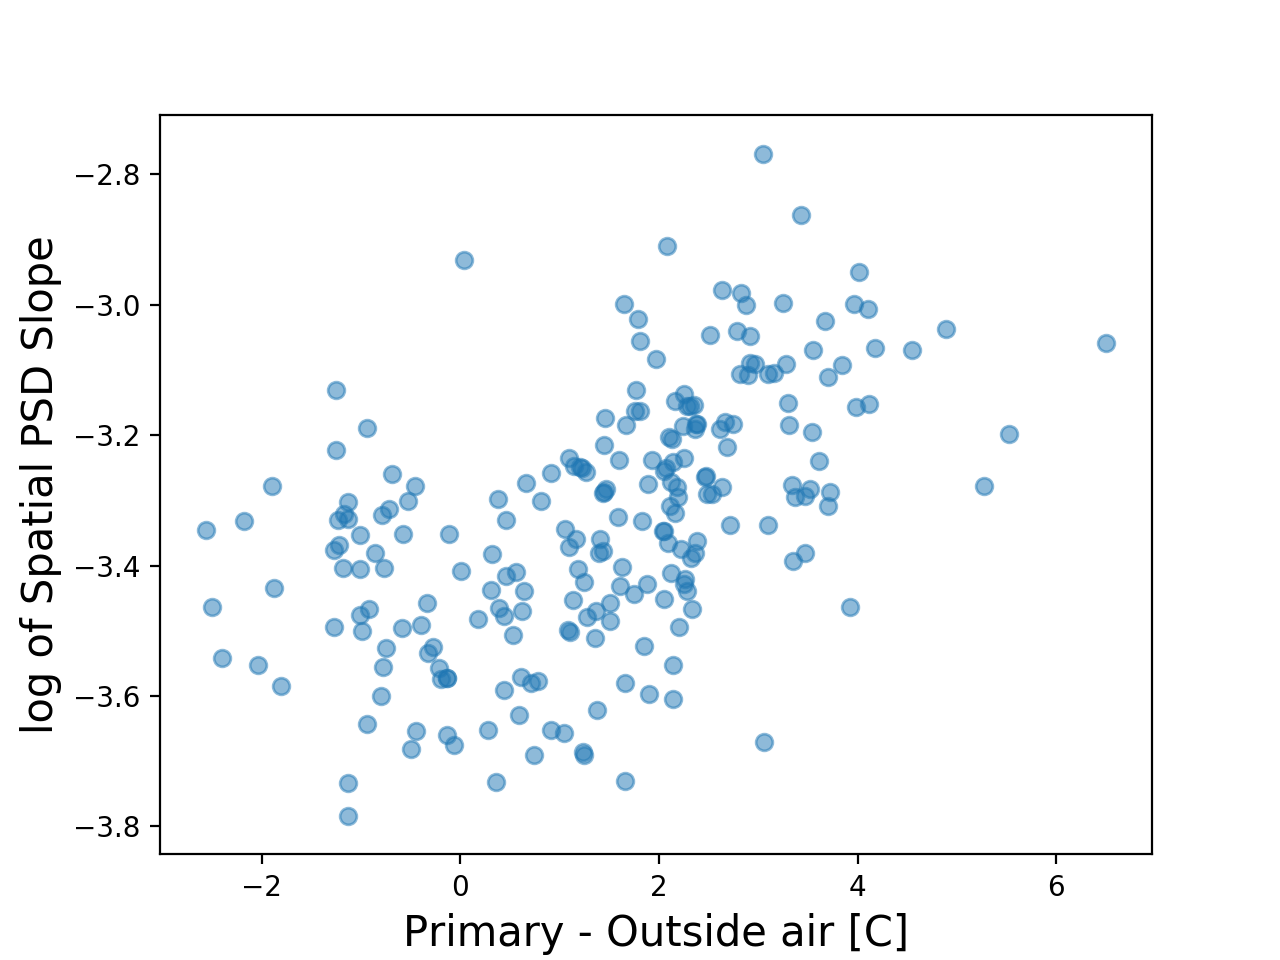

In [111]:
%matplotlib notebook

x = grouped['M1_avg']-grouped['TAMBIENT']
y = grouped['slope']
print(sum(np.isfinite(y)))


plt.figure()
plt.scatter(x,y, alpha =.5)
plt.ylabel('log of Spatial PSD Slope',fontsize=15)
plt.xlabel('Primary - Outside air [C]',fontsize=15)
#plt.colorbar()


#plt.savefig(save_path+'sp_psd_slope_vs_delT_grouped_20181204.png')


#plt.savefig(save_path+'sp_psd_slope_vs_delT_night_20181201.pdf')
#plt.plot(sp_psd_raw_IFS_data['slope'],'.',alpha=.5)

In [195]:
ind = np.where(grouped['slope'] == np.max(grouped['slope']))[0]

In [204]:
def search_for_dome_seeing(data, sample_size, presence = True):
    
    cut = 0
    sample = set()
    
    if presence:
        
        while len(sample) <= sample_size:
            tau0 = data.MASSTAU.sort_values(ascending = False)[0:cut]
            mirror_to_air_temp = np.abs(data.M1_avg - data.T_twr).sort_values(ascending = False)[0:cut]
            contrast = data.CONTR040.sort_values(ascending = False)[0:cut]
            psd_slope = data.slope.sort_values(ascending = False)[0:cut]
            sample = set(tau0.index) & set(mirror_to_air_temp.index) & set(contrast.index) & set(psd_slope.index)
            cut = cut + 1
            
    else:
        
        while len(sample) <= sample_size:
            tau0 = data.MASSTAU.sort_values(ascending = False)[0:cut]
            mirror_to_air_temp = np.abs(data.M1_avg - data.T_twr).sort_values()[0:cut]
            contrast = data.CONTR040.sort_values()[0:cut]
            psd_slope = data.slope.sort_values(ascending = True)[0:cut]
            sample = set(tau0.index) & set(mirror_to_air_temp.index) & set(contrast.index) & set(psd_slope.index)
            cut = cut + 1
    return list(sample)  

In [224]:
sp_psd_raw_IFS_data.loc[search_for_dome_seeing(sp_psd_raw_IFS_data,10,presence=True),
                       ['dts','CONTR040','M1_avg','TAMBIENT','MASSTAU','slope','filename']].sort_values("CONTR040",ascending = True)

,dts,CONTR040,M1_avg,TAMBIENT,MASSTAU,slope,filename
9182,2016-02-27 05:14:07.442880+00:00,0.000164,15.270,11.5,3.43,-2.852602,aored_When_2016.2.27_5.13.17_poldm_phase.fits
9183,2016-02-27 05:15:24.744960+00:00,0.000166,15.225,11.5,2.66,-2.898244,aored_When_2016.2.27_5.15.11_poldm_phase.fits
9094,2016-02-27 00:25:11.861760+00:00,0.000179,15.830,11.6,1.87,-2.998466,aored_When_2016.2.27_0.24.32_poldm_phase.fits
9202,2016-02-27 05:40:32.545920+00:00,0.000184,15.195,11.9,4.10,-2.950032,aored_When_2016.2.27_5.40.5_poldm_phase.fits
9107,2016-02-27 00:42:19.399679+00:00,0.000186,15.810,11.5,1.67,-2.910870,aored_When_2016.2.27_0.42.19_poldm_phase.fits
9098,2016-02-27 00:30:33.909120+00:00,0.000193,15.820,11.4,1.55,-2.771036,aored_When_2016.2.27_0.29.52_poldm_phase.fits
14734,2016-11-19 02:16:49.926720+00:00,0.000200,14.115,10.4,1.23,-2.990813,aored_When_2016.11.19_2.15.53_poldm_phase.fits
9138,2016-02-27 02:09:39.032640+00:00,0.000206,15.550,11.4,3.16,-2.834502,aored_When_2016.2.27_2.9.20_poldm_phase.fits
14738,2016-11-19 02:21:48.473280+00:00,0.000211,14.080,10.3,1.30,-3.063740,aored_When_2016.11.19_2.20.58_poldm_phase.fits
9096,2016-02-27 00:27:45.895680+00:00,0.000224,15.830,11.5,2.08,-2.860502,aored_When_2016.2.27_0.26.55_poldm_phase.fits


In [225]:
sp_psd_raw_IFS_data.loc[search_for_dome_seeing(sp_psd_raw_IFS_data,10,presence=False),
                       ['dts','CONTR040','M1_avg','TAMBIENT','MASSTAU','slope','filename']].sort_values("CONTR040",ascending = False)

,dts,CONTR040,M1_avg,TAMBIENT,MASSTAU,slope,filename
6796,2015-09-01 06:17:06.034561+00:00,0.000088,16.590,17.2,1.09,-3.451511,aored_When_2015.9.1_6.16.53_poldm_phase.fits
13027,2016-09-19 02:25:29.043840+00:00,0.000087,15.205,16.0,2.54,-3.543857,aored_When_2016.9.19_2.25.7_poldm_phase.fits
12668,2016-09-18 03:29:39.900480+00:00,0.000086,13.060,14.2,3.72,-3.360963,aored_When_2016.9.18_3.29.6_poldm_phase.fits
12643,2016-09-18 02:34:39.835199+00:00,0.000083,12.860,13.9,2.84,-3.489710,aored_When_2016.9.18_2.34.2_poldm_phase.fits
13117,2016-09-19 05:59:40.058879+00:00,0.000071,15.450,16.4,3.76,-3.359944,aored_When_2016.9.19_5.59.11_poldm_phase.fits
6680,2015-09-01 03:06:07.165440+00:00,0.000063,16.425,17.6,1.36,-3.460932,aored_When_2015.9.1_3.5.54_poldm_phase.fits
6672,2015-09-01 02:54:35.317440+00:00,0.000056,16.425,17.3,1.38,-3.484744,aored_When_2015.9.1_2.54.25_poldm_phase.fits
6693,2015-09-01 03:22:44.126400+00:00,0.000053,16.445,17.7,1.51,-3.460818,aored_When_2015.9.1_3.22.33_poldm_phase.fits
1928,2015-01-30 01:07:25.870079+00:00,0.000052,15.980,15.3,3.69,-3.755189,aored_When_2015.1.30_1.7.16_poldm_phase.fits
4992,2015-07-04 03:28:37.701121+00:00,0.000048,7.180,8.3,1.87,-3.356738,aored_When_2015.7.4_3.27.52_poldm_phase.fits
